Conduct exploratory data analysis on the attached data and also implement Regression and Classification models using the following guidelines

1. Conduct exploratory analysis of the data and provide a detailed description of the data
2. Implement regression modeling using 4 different regression algorithms to predict the age of employees leaving the firm. Explain the results of each of the models and any variance observed
3. Implement classification modeling using 4 different classification algorithms models to predict the attrition of employees leaving the firm. Explain the results of each of the models and any variance observed

In [53]:
#importing necessary libraries to be used in the 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
import seaborn as sb
from pandas import set_option
from sklearn.feature_selection  import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [2]:
#Loading my data set
FilePath = 'C:/Users/User/Documents/WORK SPACE/'
FileName = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(FilePath + FileName)

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#doing a quick check on my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
#check for missing data
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#check for duplicates
df.duplicated().sum()

0

In [7]:
df.select_dtypes('object').head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [8]:
#Checking the labels on the categorical data
print(set(df.Attrition))
print(set(df.Department))
print(set(df.EducationField))
print(set(df.BusinessTravel))
print(set(df.Gender))
print(set(df.JobRole))
print(set(df.MaritalStatus))
print(set(df.Over18))
print(set(df.OverTime))

{'Yes', 'No'}
{'Research & Development', 'Sales', 'Human Resources'}
{'Technical Degree', 'Other', 'Life Sciences', 'Marketing', 'Medical', 'Human Resources'}
{'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'}
{'Female', 'Male'}
{'Research Director', 'Research Scientist', 'Healthcare Representative', 'Manufacturing Director', 'Laboratory Technician', 'Manager', 'Sales Representative', 'Sales Executive', 'Human Resources'}
{'Married', 'Single', 'Divorced'}
{'Y'}
{'Yes', 'No'}


In [9]:
#The Over18  has only one label that is common for 
df.drop('Over18', axis = 1, inplace = True)

In [10]:
df.select_dtypes('object').head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [11]:
#converting the categorical input data set to numerical(X) using Label encoding
le = LabelEncoder()
df.Attrition = le.fit_transform(df.Attrition)
df.BusinessTravel = le.fit_transform(df.BusinessTravel)
df.Department = le.fit_transform(df.Department)
df.EducationField = le.fit_transform(df.EducationField)
df.Gender = le.fit_transform(df.Gender)
df.JobRole = le.fit_transform(df.JobRole)
df.MaritalStatus = le.fit_transform(df.MaritalStatus)
df.OverTime = le.fit_transform(df.OverTime)

In [12]:
df.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,1,0,1,0,0
BusinessTravel,2,1,2,1,2
DailyRate,1102,279,1373,1392,591
Department,2,1,1,1,1
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,1,1,4,1,3
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [13]:
print(df['Attrition'].unique())
print(df['BusinessTravel'].unique())
print(df['Department'].unique())
print(df['EducationField'].unique())
print(df['Gender'].unique())
print(df['JobRole'].unique())
print(df['MaritalStatus'].unique())
print(df['OverTime'].unique())

[1 0]
[2 1 0]
[2 1 0]
[1 4 3 2 5 0]
[0 1]
[7 6 2 4 0 3 8 5 1]
[2 1 0]
[1 0]


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.00,2.0,2.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Department,1470.0,1.260544,0.527792,0.0,1.00,1.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EducationField,1470.0,2.247619,1.331369,0.0,1.00,2.0,3.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'BusinessTravel'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'Department'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EducationField'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobRole'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>],
       [<AxesSub

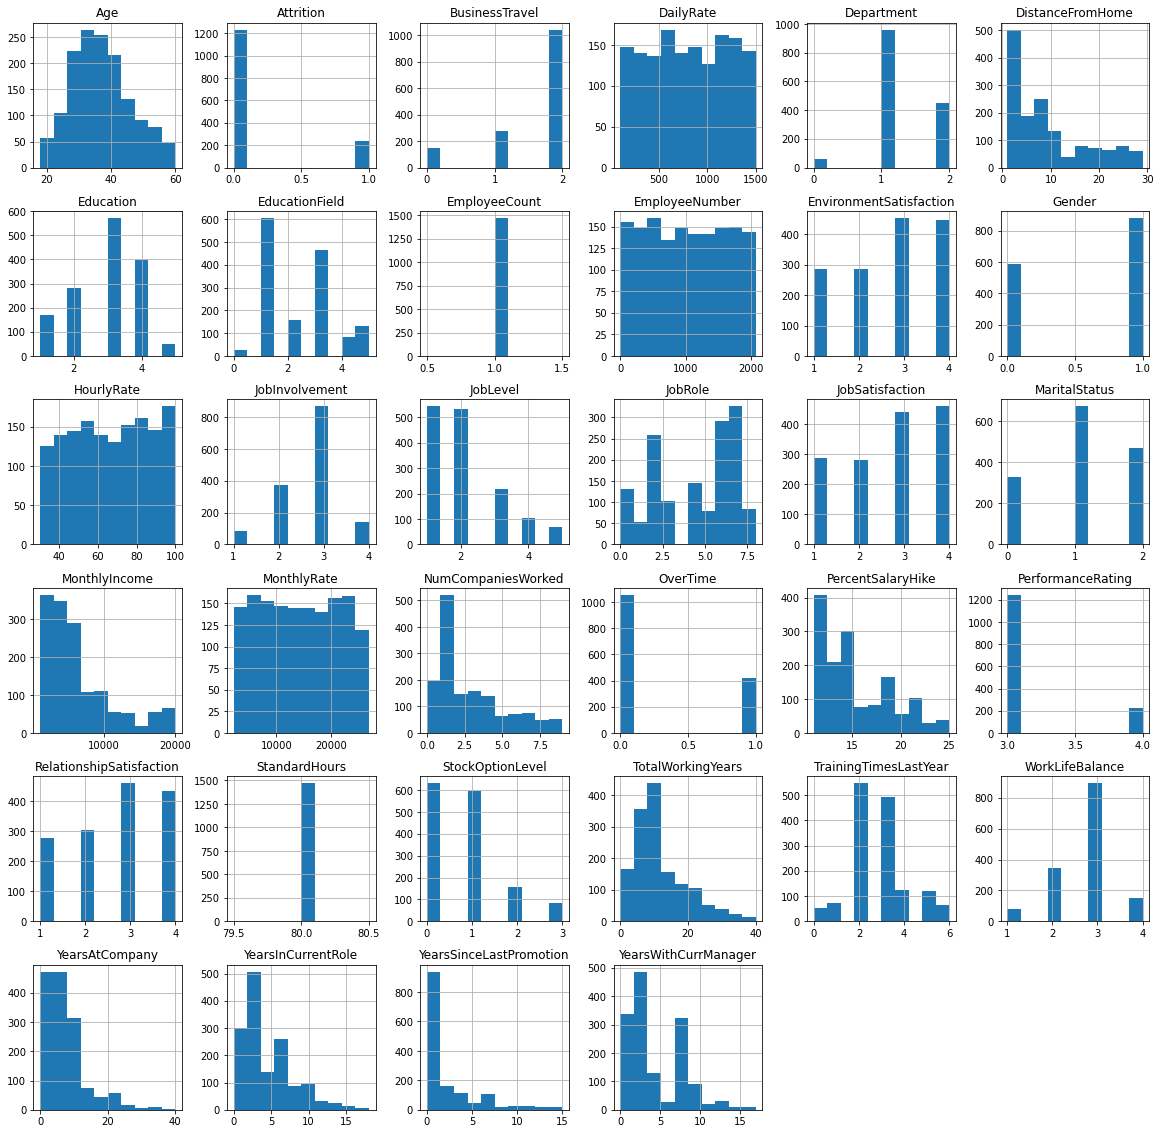

In [15]:
#checking the distribution per feature on my dataset
df.hist(figsize = (20, 20))

def X_subset_cols():
    for cols in df.columns:
        if cols == 'Age':
            continue
        print(cols)

**REGRESSION**
------
***To check age of employees leaving the company***

First rescale my data set with the Age feature being my Y variable

In [16]:
#Most of the features are skewed hence the need for tranformation
print(len(df.columns))

#Transform the data set into array
array = df.values
#subset the dataset in X and Y
X = array[:,1:]
Y = array[:,0]
#Call the MinMaxscaler on a range of 0,1 to rescale X
dfx = MinMaxScaler(feature_range =(0, 1))
resX = dfx.fit_transform(X)

#tranform resX to a dataframe
dfx1 = pd.DataFrame(resX)
dfx1.columns = ['Attrition','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

34


In [17]:
dfx1

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.0,1.0,0.715820,1.0,0.000000,0.25,0.2,0.0,0.000000,0.333333,...,0.000000,0.0,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.0,0.5,0.126700,0.5,0.250000,0.00,0.2,0.0,0.000484,0.666667,...,1.000000,0.0,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,1.0,1.0,0.909807,0.5,0.035714,0.25,0.8,0.0,0.001451,1.000000,...,0.333333,0.0,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.0,0.5,0.923407,0.5,0.071429,0.75,0.2,0.0,0.001935,1.000000,...,0.666667,0.0,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.0,1.0,0.350036,0.5,0.035714,0.00,0.6,0.0,0.002903,0.000000,...,1.000000,0.0,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,0.5,0.559771,0.5,0.785714,0.25,0.6,0.0,0.996613,0.666667,...,0.666667,0.0,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,0.0,1.0,0.365784,0.5,0.178571,0.00,0.6,0.0,0.997097,1.000000,...,0.000000,0.0,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,0.0,1.0,0.037938,0.5,0.107143,0.50,0.2,0.0,0.998065,0.333333,...,0.333333,0.0,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,0.0,0.5,0.659270,1.0,0.035714,0.50,0.6,0.0,0.998549,1.000000,...,1.000000,0.0,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588


df.columns

In [18]:
dfx1.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition,1470.0,0.161224,0.367863,0.0,0.000000,0.000000,0.000000,1.0
BusinessTravel,1470.0,0.803741,0.332727,0.0,0.500000,1.000000,1.000000,1.0
DailyRate,1470.0,0.501421,0.288840,0.0,0.259843,0.501074,0.755190,1.0
Department,1470.0,0.630272,0.263896,0.0,0.500000,0.500000,1.000000,1.0
DistanceFromHome,1470.0,0.292590,0.289531,0.0,0.035714,0.214286,0.464286,1.0
Education,1470.0,0.478231,0.256041,0.0,0.250000,0.500000,0.750000,1.0
EducationField,1470.0,0.449524,0.266274,0.0,0.200000,0.400000,0.600000,1.0
EmployeeCount,1470.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
EmployeeNumber,1470.0,0.495339,0.291255,0.0,0.237179,0.493227,0.752177,1.0
EnvironmentSatisfaction,1470.0,0.573923,0.364361,0.0,0.333333,0.666667,1.000000,1.0


In [19]:
#Returning the Age column to my dfx1 data-set after rescaling
dfx1['Age'] = df['Age']

In [20]:
dfx1.head().T

,0,1,2,3,4
Attrition,1.000000,0.000000,1.000000,0.000000,0.000000
BusinessTravel,1.000000,0.500000,1.000000,0.500000,1.000000
DailyRate,0.715820,0.126700,0.909807,0.923407,0.350036
Department,1.000000,0.500000,0.500000,0.500000,0.500000
DistanceFromHome,0.000000,0.250000,0.035714,0.071429,0.035714
Education,0.250000,0.000000,0.250000,0.750000,0.000000
EducationField,0.200000,0.200000,0.800000,0.200000,0.600000
EmployeeCount,0.000000,0.000000,0.000000,0.000000,0.000000
EmployeeNumber,0.000000,0.000484,0.001451,0.001935,0.002903
EnvironmentSatisfaction,0.333333,0.666667,1.000000,1.000000,0.000000


In [21]:
len(dfx1.columns)

34

In [22]:
#After rescaling the variance is not big hence no need to standardise the data hence move directly to Normalization
#Transform the data set into array
array = dfx1.values
#subset the dataset in X and Y
X = array[:,0:33]
Y = array[:,33]
#Call the Normalizer
dfx2 = Normalizer().fit(X)
dfx3 = dfx2.transform(X)

In [23]:
dfx4 = pd.DataFrame(dfx3)
dfx4.columns = ['Attrition','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [24]:
dfx4.head().T

,0,1,2,3,4
Attrition,0.310398,0.000000,0.307879,0.000000,0.000000
BusinessTravel,0.310398,0.174127,0.307879,0.177359,0.381818
DailyRate,0.222189,0.044124,0.280110,0.327550,0.133650
Department,0.310398,0.174127,0.153939,0.177359,0.190909
DistanceFromHome,0.000000,0.087064,0.010996,0.025337,0.013636
Education,0.077599,0.000000,0.076970,0.266039,0.000000
EducationField,0.062080,0.069651,0.246303,0.070944,0.229091
EmployeeCount,0.000000,0.000000,0.000000,0.000000,0.000000
EmployeeNumber,0.000000,0.000168,0.000447,0.000686,0.001108
EnvironmentSatisfaction,0.103466,0.232169,0.307879,0.354719,0.000000


In [25]:
len(dfx4.columns)

33

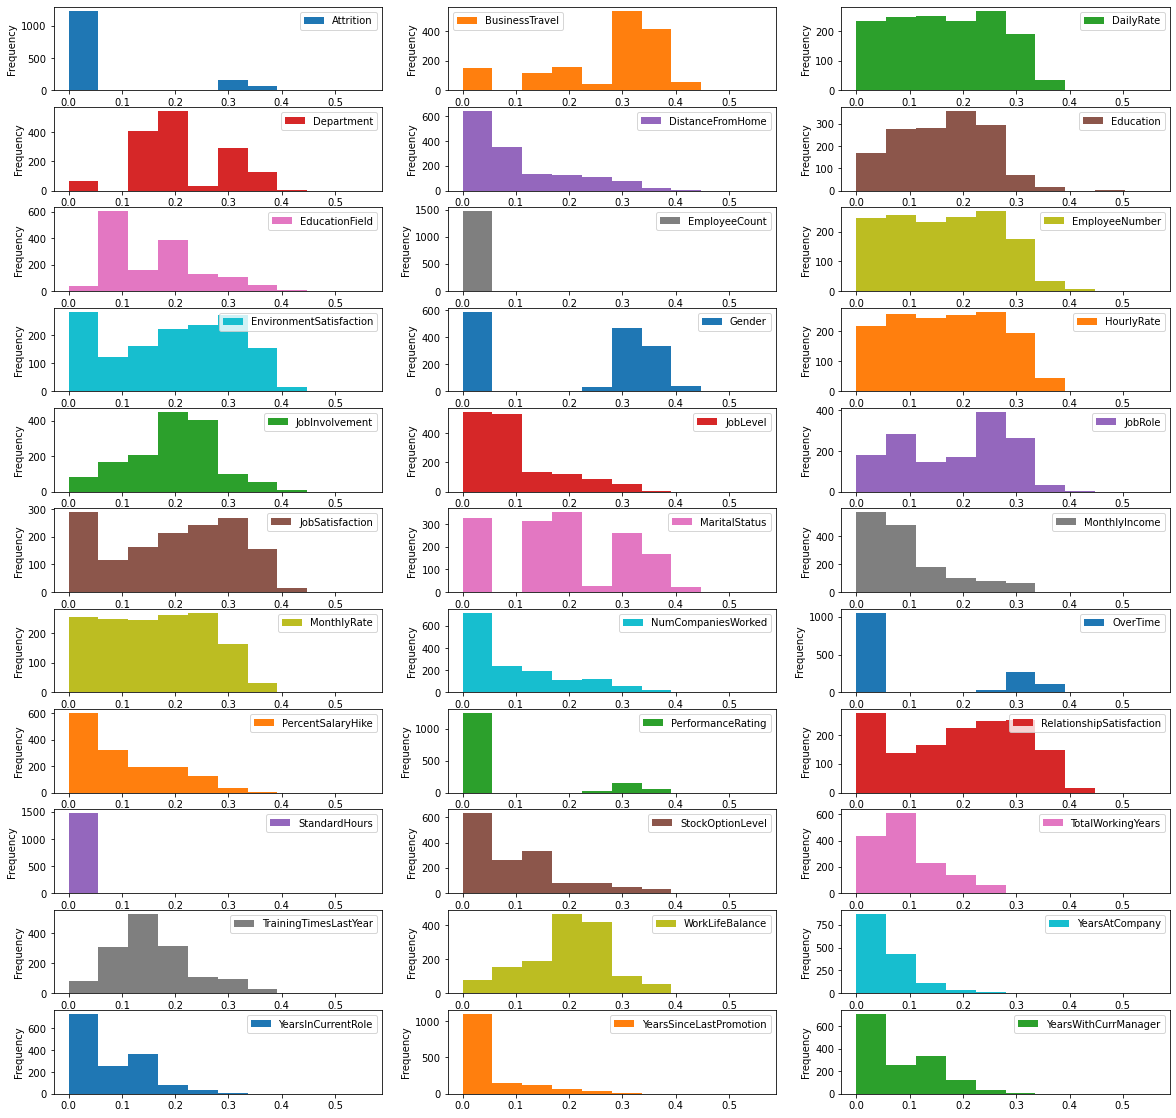

In [26]:
dfx4.plot(kind = 'hist', subplots = True, layout =(11,3), sharex = False, figsize =(20,20))
pyplot.show()

In [27]:
#checking on skewness in my data after normalization....I can conclude that the datasets are relatively normal
print(dfx4['YearsInCurrentRole'].skew())
print(dfx4['StandardHours'].skew())
print(dfx4['TotalWorkingYears'].skew())
print(dfx4['YearsWithCurrManager'].skew())

0.7725942164409171
0
0.9420643923237454
0.7775096339438397


<AxesSubplot:>

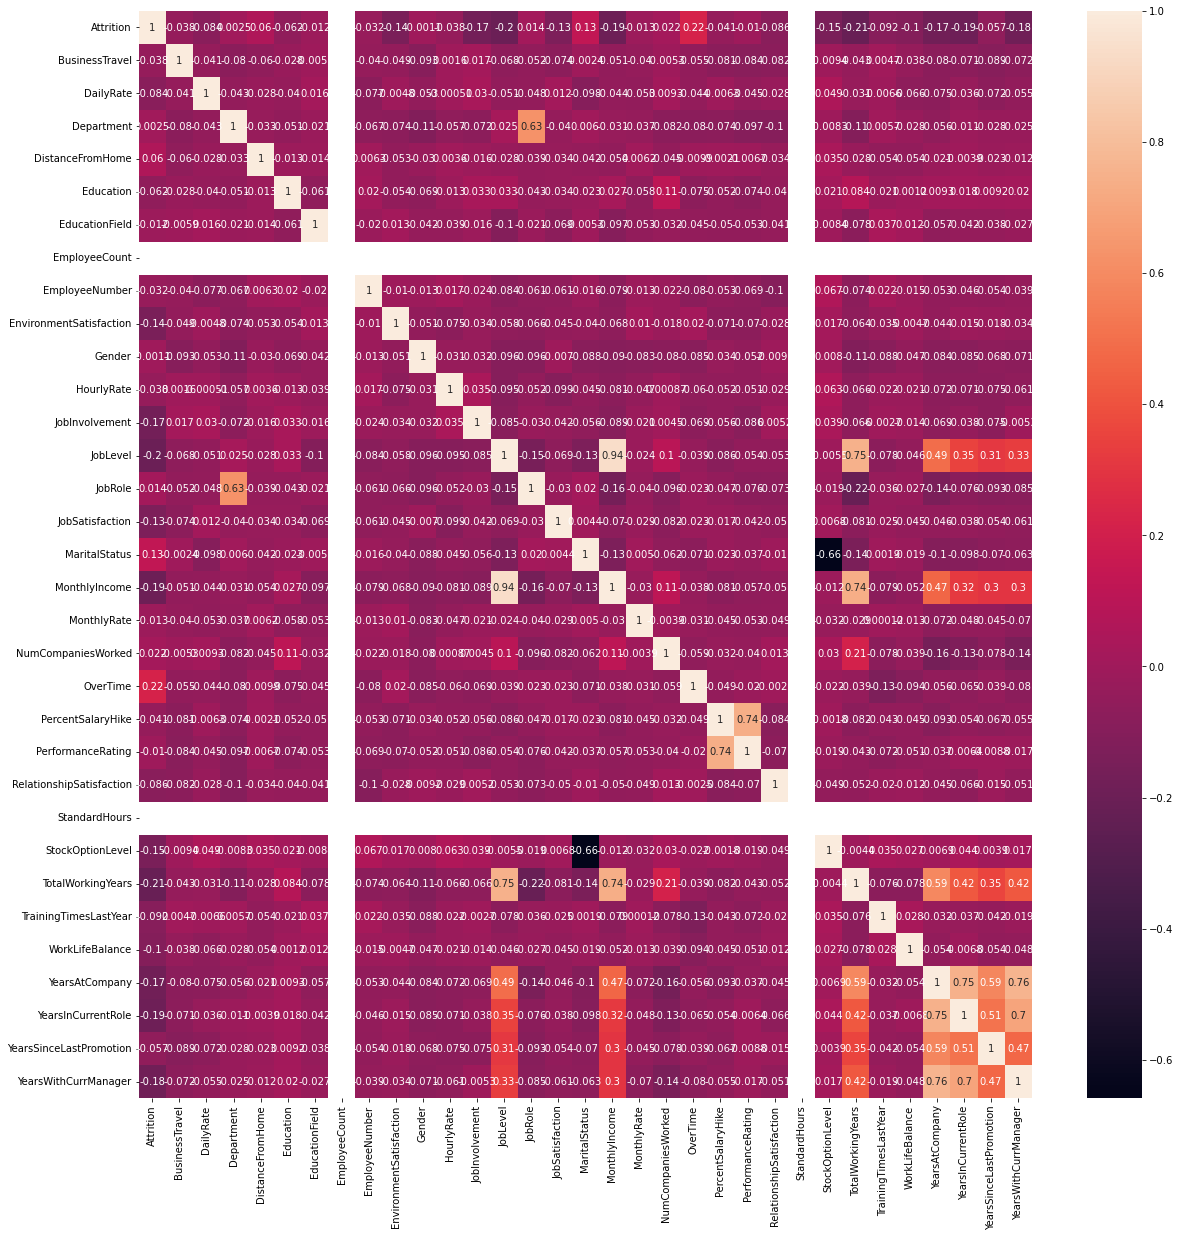

In [28]:
#checking for correlation among X-feature and dropping those with a correlation of 0.9 - 1
set_option('display.width', 100)
plt.figure(figsize = (20,20))
sb.heatmap(dfx4.corr(), annot = True)

In [29]:
'''
droping features with correlation of 0.9 to 1 since the have the same strength hence might cause overfitting
on the models
'''
dfx4.drop('EmployeeCount',axis = 1, inplace = True)
dfx4.drop('JobLevel', axis = 1, inplace = True)

In [30]:
len(dfx4.columns)

31

<AxesSubplot:>

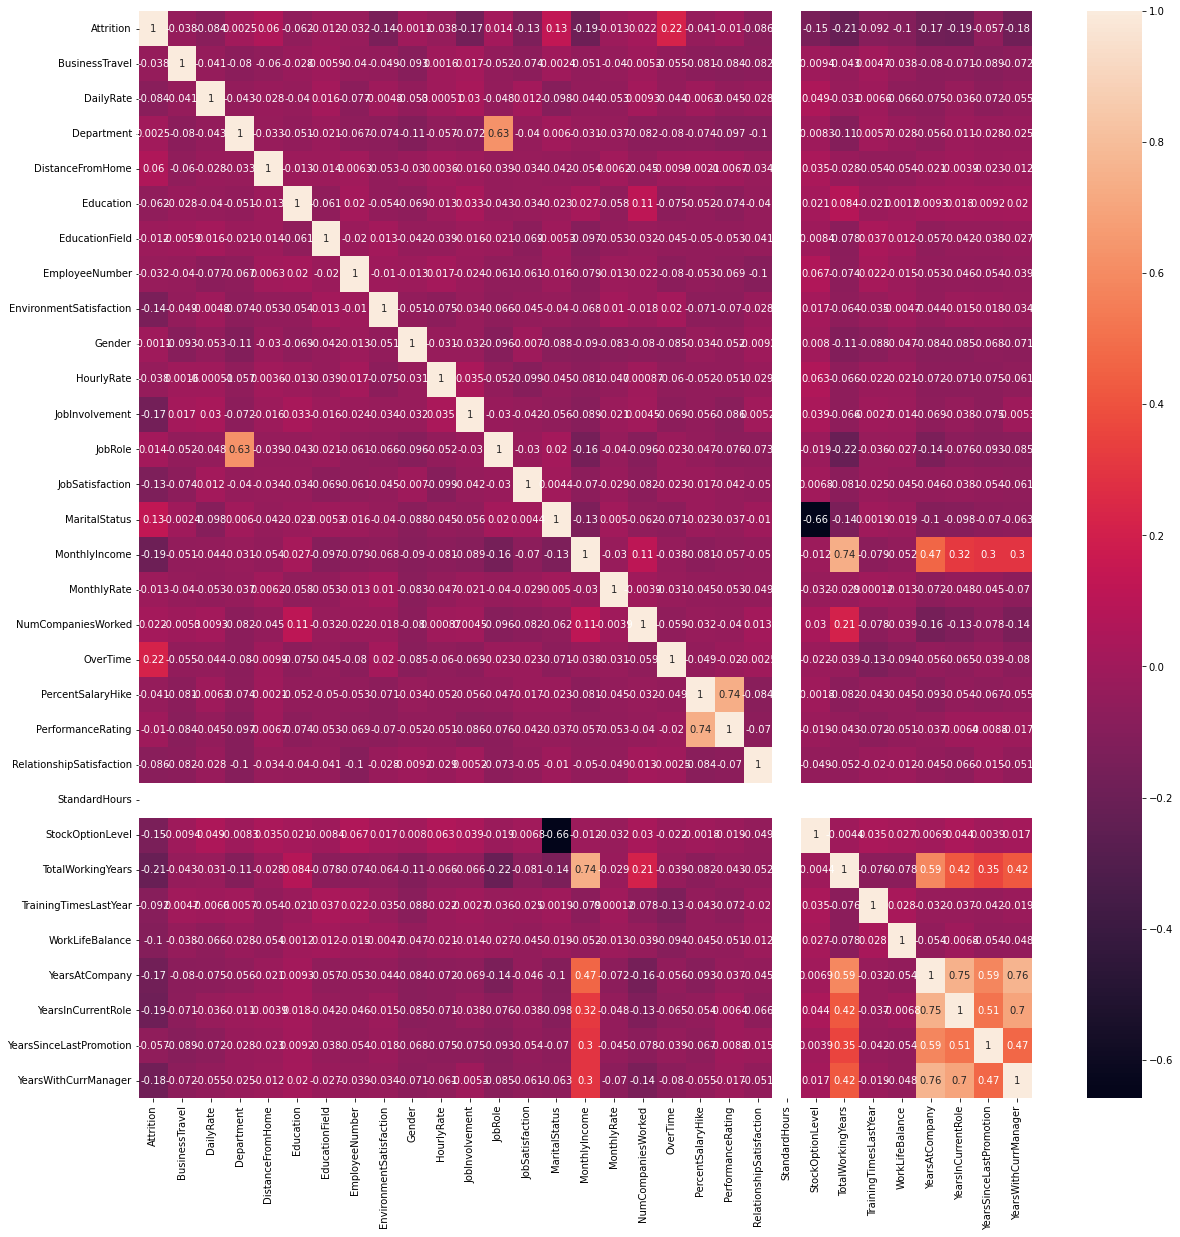

In [31]:
#checking for muliti collinearity among X-feature and dropping those wiyh a correlation of 0.9 -1
set_option('display.width', 100)
plt.figure(figsize = (20,20))
sb.heatmap(dfx4.corr(), annot = True)

Feature Selection 
--------------------------------------------------------------------------
I will conduct RFE (Recurssive feature Elimination) on my regression models

In [32]:
dfx4['Age'] = dfx1['Age']

In [33]:
dfx4.head().T

,0,1,2,3,4
Attrition,0.310398,0.000000,0.307879,0.000000,0.000000
BusinessTravel,0.310398,0.174127,0.307879,0.177359,0.381818
DailyRate,0.222189,0.044124,0.280110,0.327550,0.133650
Department,0.310398,0.174127,0.153939,0.177359,0.190909
DistanceFromHome,0.000000,0.087064,0.010996,0.025337,0.013636
Education,0.077599,0.000000,0.076970,0.266039,0.000000
EducationField,0.062080,0.069651,0.246303,0.070944,0.229091
EmployeeNumber,0.000000,0.000168,0.000447,0.000686,0.001108
EnvironmentSatisfaction,0.103466,0.232169,0.307879,0.354719,0.000000
Gender,0.000000,0.348254,0.307879,0.000000,0.381818


In [34]:
len(dfx4.columns)

32

In [35]:
Arr  = dfx4.values
X = Arr[:,0:31]
Y = Arr[:,31]
model = LinearRegression()
rfe = RFE(model, 17)
fit = rfe.fit(X,Y)
print("Num features: {}" .format(fit.n_features_))
print("selected features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Num features: 17
selected features: [False False False  True False  True False False  True False  True  True
 False  True False False  True  True  True  True False  True False False
  True  True False  True  True  True  True]
Feature Ranking: [14  4  9  1  6  1 10  5  1  2  1  1  8  1 13  7  1  1  1  1  3  1 15 12
  1  1 11  1  1  1  1]


In [36]:
ViableCols = []
ranking = list(fit.ranking_)
FeatureList = ['Attrition','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement','JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
for rank, cols in zip(ranking, FeatureList):
    idx = rank
    ColName = cols
    if idx == 1:
        ViableCols.append(ColName)
SelectedFeature = dfx4.loc[:,ViableCols]

In [37]:
len(SelectedFeature.columns)

17

In [38]:
SelectedFeature.head().T

,0,1,2,3,4
Department,0.310398,0.174127,0.153939,0.177359,0.190909
Education,0.077599,0.000000,0.076970,0.266039,0.000000
EnvironmentSatisfaction,0.103466,0.232169,0.307879,0.354719,0.000000
HourlyRate,0.283792,0.154227,0.272693,0.131753,0.054545
JobInvolvement,0.206932,0.116085,0.102626,0.236479,0.254545
JobSatisfaction,0.310398,0.116085,0.205252,0.236479,0.127273
MonthlyRate,0.216674,0.319001,0.003733,0.300026,0.222882
NumCompaniesWorked,0.275909,0.038695,0.205252,0.039413,0.381818
OverTime,0.310398,0.000000,0.307879,0.354719,0.000000
PercentSalaryHike,0.000000,0.298504,0.087965,0.000000,0.027273


In [39]:
SelectedFeature['Age'] = dfx4['Age']

In [40]:
len(SelectedFeature.columns)

18

Now beginning to work on my Regression models and here are the algorithms I will test 
-----------
<li>Linear Regression
<li>Ridge
<li>KNeighborsRegressor
<li>SVR

In [43]:
arr = SelectedFeature.values
X = array[:,0:17] 
Y = array[:,17]

test_size = 0.2
seed = 7

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = test_size, random_state = seed)

model = LinearRegression()

model.fit(X_train,Y_train)

results = model.score(X_test,Y_test)

print(np.mean(results))

0.8864469023266391


In [44]:
arr = SelectedFeature.values
X = array[:,0:17] 
Y = array[:,17]

test_size = 0.2
seed = 7

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = test_size, random_state = seed)

model = Ridge()

model.fit(X_train,Y_train)

results = model.score(X_test,Y_test)

print(np.mean(results))

0.8865547484203313


In [54]:
arr = SelectedFeature.values
X = array[:,0:17] 
Y = array[:,17]

test_size = 0.2
seed = 7

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = test_size, random_state = seed)

model = DecisionTreeRegressor()

model.fit(X_train,Y_train)

results = model.score(X_test,Y_test)

print(np.mean(results))

0.8458626005278503


In [46]:
arr = SelectedFeature.values
X = array[:,0:17] 
Y = array[:,17]

test_size = 0.2
seed = 7

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = test_size, random_state = seed)

model = SVR()

model.fit(X_train,Y_train)

results = model.score(X_test,Y_test)

print(np.mean(results))

0.8574857712857333


<li>The regression models that I used almost all work well in predicting the age of employees leaving the job starting with
<li>Linear Regression
<li>Followed by Ridge Regrssion
<li>Support vector machine came third then the decision tree
          

CLASSIFICATION MODELS ON EMPLOYEE ATRITTION
-----------
<li>subset the data and rescale and normalize with attrition being the target variable.
<li>Test for multicollinearity on my dependent variable.
<li>Conduct feature selection to select the best features that will go into the model.
<li>Use for best algorithms....In this case I will not use Naive Baise because I will conduct feature
selection using RFE,naive baise requires univariate feature selection.

In [52]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [54]:
dfxx = df.drop(['Attrition'], axis = 1)
dfxx

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [55]:
dfxx['Attrition'] = df['Attrition']
dfxx

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,7,1,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,80,1,17,3,3,5,2,0,3,0
1466,39,2,613,1,6,1,3,1,2062,4,...,80,1,9,5,3,7,7,1,7,0
1467,27,2,155,1,4,3,1,1,2064,2,...,80,1,6,0,3,6,2,0,3,0
1468,49,1,1023,2,2,3,3,1,2065,4,...,80,0,17,3,2,9,6,0,8,0


In [56]:
dfxx.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.00,2.0,2.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Department,1470.0,1.260544,0.527792,0.0,1.00,1.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EducationField,1470.0,2.247619,1.331369,0.0,1.00,2.0,3.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0


In [57]:
#Transform the data set into array
array = dfxx.values
#subset the dataset in X and Y
X = array[:,0:33]
Y = array[:,33]
#Call the MinMaxscaler on a range of 0,1 to rescale X
df1 = MinMaxScaler(feature_range =(0, 1))
rescaledX = df1.fit_transform(X)

#tranform resX to a dataframe
df2 = pd.DataFrame(rescaledX)
df2.columns = ['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [58]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,0.450567,0.217509,0.0,0.285714,0.428571,0.595238,1.0
BusinessTravel,1470.0,0.803741,0.332727,0.0,0.500000,1.000000,1.000000,1.0
DailyRate,1470.0,0.501421,0.288840,0.0,0.259843,0.501074,0.755190,1.0
Department,1470.0,0.630272,0.263896,0.0,0.500000,0.500000,1.000000,1.0
DistanceFromHome,1470.0,0.292590,0.289531,0.0,0.035714,0.214286,0.464286,1.0
Education,1470.0,0.478231,0.256041,0.0,0.250000,0.500000,0.750000,1.0
EducationField,1470.0,0.449524,0.266274,0.0,0.200000,0.400000,0.600000,1.0
EmployeeCount,1470.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
EmployeeNumber,1470.0,0.495339,0.291255,0.0,0.237179,0.493227,0.752177,1.0
EnvironmentSatisfaction,1470.0,0.573923,0.364361,0.0,0.333333,0.666667,1.000000,1.0


In [59]:
df2['Attrition'] = dfxx['Attrition']
df2

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.0,0.000000,0.333333,...,0.0,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118,1
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.0,0.000484,0.666667,...,0.0,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765,0
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,0.0,0.001451,1.000000,...,0.0,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000,1
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,0.0,0.001935,1.000000,...,0.0,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000,0
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.0,0.002903,0.000000,...,0.0,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.559771,0.5,0.785714,0.25,0.6,0.0,0.996613,0.666667,...,0.0,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471,0
1466,0.500000,1.0,0.365784,0.5,0.178571,0.00,0.6,0.0,0.997097,1.000000,...,0.0,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765,0
1467,0.214286,1.0,0.037938,0.5,0.107143,0.50,0.2,0.0,0.998065,0.333333,...,0.0,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471,0
1468,0.738095,0.5,0.659270,1.0,0.035714,0.50,0.6,0.0,0.998549,1.000000,...,0.0,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588,0


In [60]:
#Normalizing my dataset
array = df2.values
#subset the dataset in X and Y
X = array[:,0:33]
Y = array[:,33]
#Call the Normalizer
df3 = Normalizer().fit(X)
df4 = df3.transform(X)

In [61]:
df5 = pd.DataFrame(df4)
df5.columns = ['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel

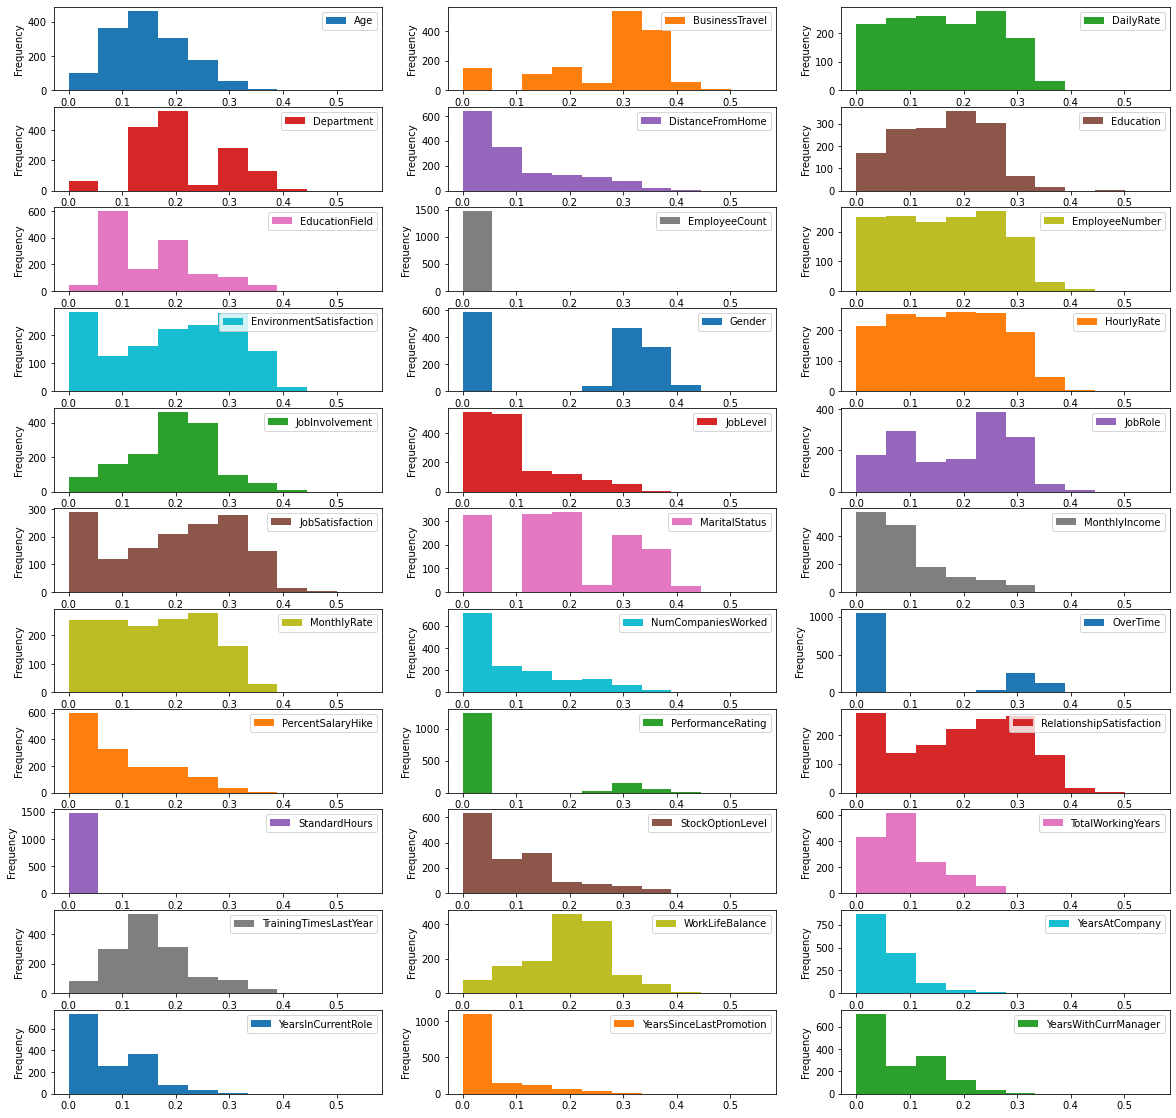

In [62]:
df5.plot(kind = 'hist', subplots = True, sharex = False, layout = (11,3), figsize = (20,20))

<AxesSubplot:>

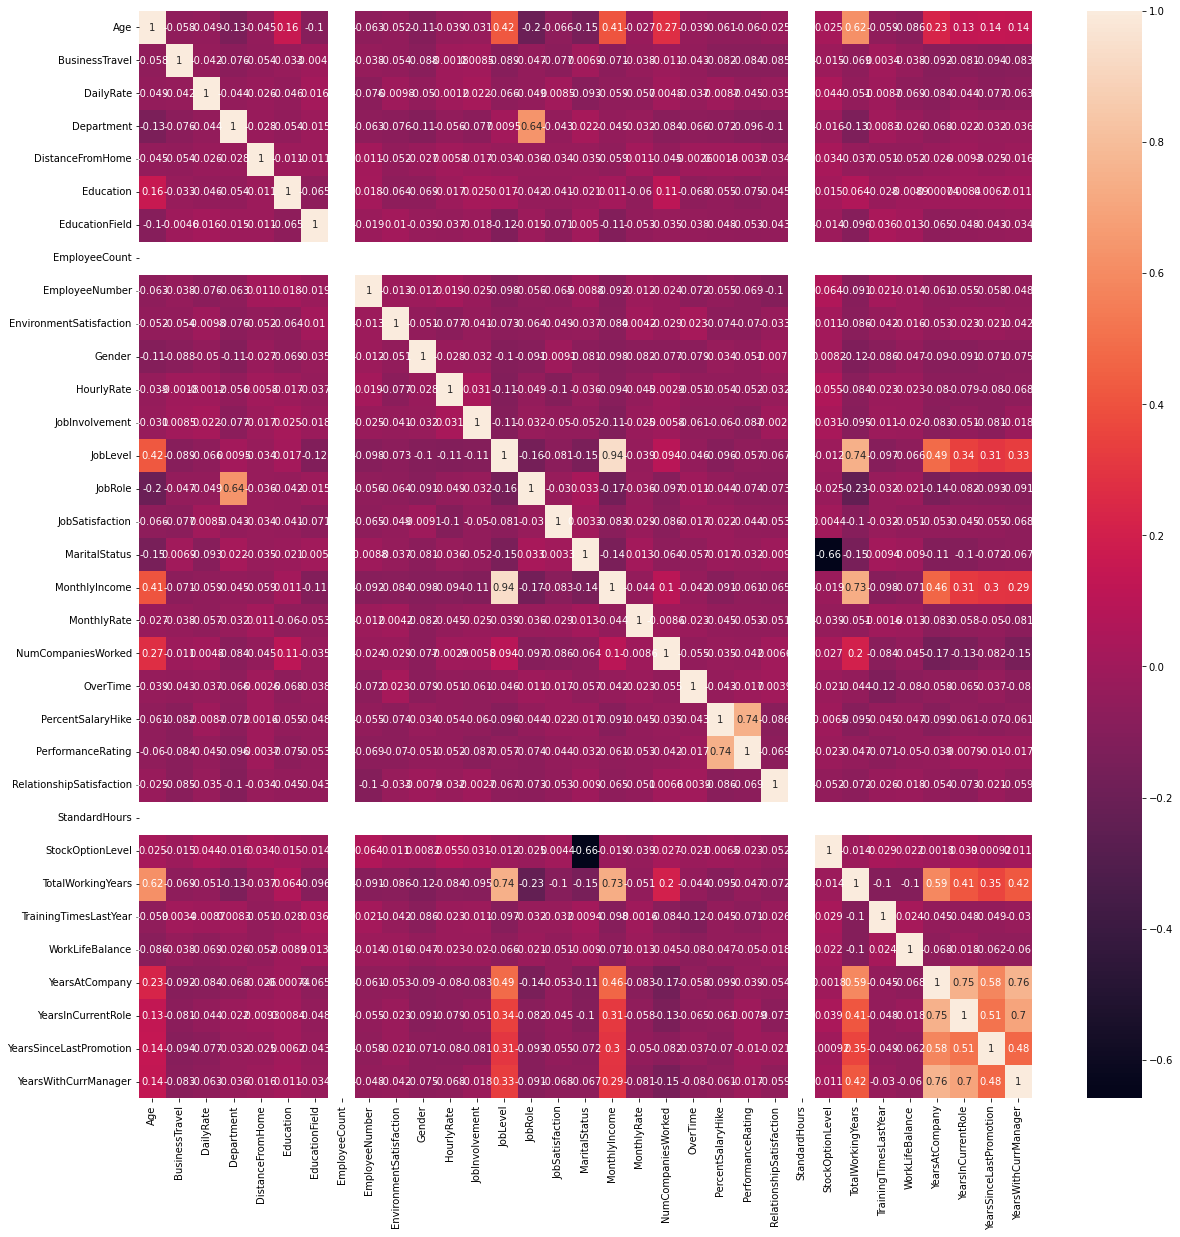

In [63]:
#checking for multicollinearity
set_option('display.width', 100)
plt.figure(figsize = (20,20))
sb.heatmap(df5.corr(), annot = True)

In [64]:
df5.drop('EmployeeCount',axis = 1, inplace = True)
df5.drop('JobLevel', axis = 1, inplace = True)

<AxesSubplot:>

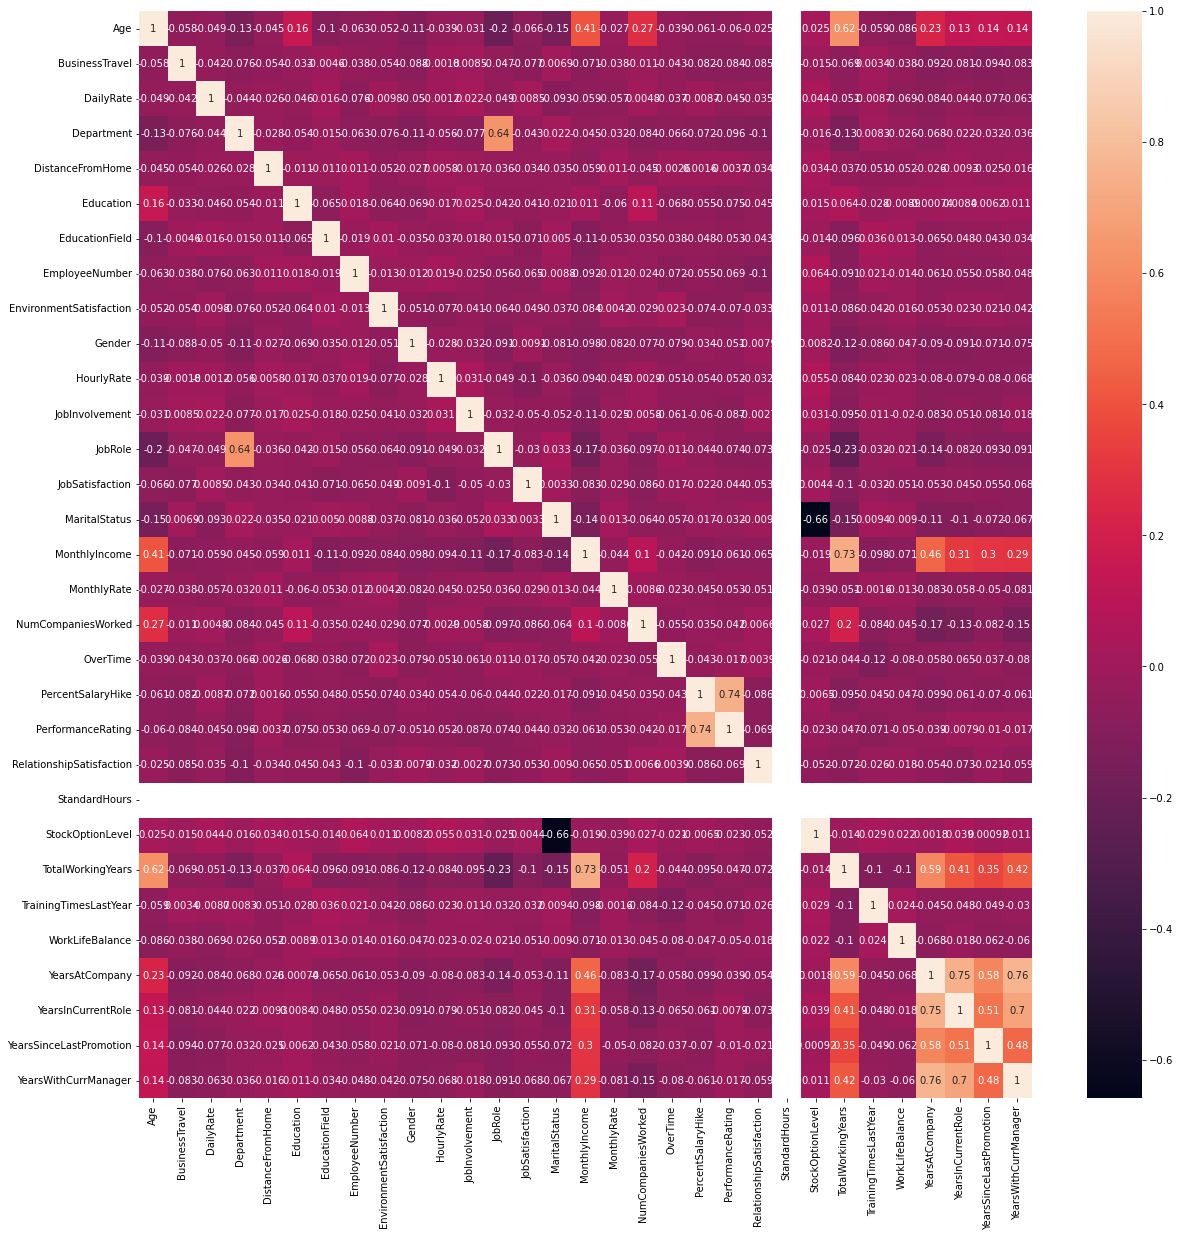

In [65]:
set_option('display.width', 100)
plt.figure(figsize = (20,20))
sb.heatmap(df5.corr(), annot = True)

In [67]:
df5['Attrition'] = df2['Attrition']
df5

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.176020,0.321428,0.230084,0.321428,0.000000,0.080357,0.064286,0.000000,0.107143,0.000000,...,0.0,0.000000,0.064286,0.000000,0.000000,0.048214,0.071428,0.000000,0.094538,1
1,0.248952,0.168645,0.042735,0.168645,0.084322,0.000000,0.067458,0.000163,0.224860,0.337290,...,0.0,0.112430,0.084322,0.168645,0.224860,0.084322,0.131168,0.022486,0.138884,0
2,0.144845,0.320185,0.291306,0.160092,0.011435,0.080046,0.256148,0.000465,0.320185,0.320185,...,0.0,0.000000,0.056032,0.160092,0.213456,0.000000,0.000000,0.000000,0.000000,1
3,0.125681,0.175953,0.324953,0.175953,0.025136,0.263930,0.070381,0.000681,0.351906,0.000000,...,0.0,0.000000,0.070381,0.175953,0.234604,0.070381,0.136852,0.070381,0.000000,0
4,0.081546,0.380547,0.133205,0.190273,0.013591,0.000000,0.228328,0.001105,0.000000,0.380547,...,0.0,0.126849,0.057082,0.190273,0.253698,0.019027,0.042283,0.050740,0.044770,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.143500,0.167417,0.187430,0.167417,0.263083,0.083708,0.200900,0.333699,0.223222,0.334833,...,0.0,0.111611,0.142304,0.167417,0.223222,0.041854,0.037204,0.000000,0.059088,0
1466,0.172268,0.344537,0.126026,0.172268,0.061524,0.000000,0.206722,0.343536,0.344537,0.344537,...,0.0,0.114846,0.077521,0.287114,0.229691,0.060294,0.133986,0.022969,0.141868,0
1467,0.070222,0.327704,0.012433,0.163852,0.035111,0.163852,0.065541,0.327070,0.109235,0.327704,...,0.0,0.109235,0.049156,0.000000,0.218469,0.049156,0.036412,0.000000,0.057830,0
1468,0.237796,0.161087,0.212400,0.322175,0.011506,0.161087,0.193305,0.321707,0.322175,0.322175,...,0.0,0.000000,0.136924,0.161087,0.107392,0.072489,0.107392,0.000000,0.151612,0


In [68]:
len(df5.columns)

32

In [146]:
#conducting feature selection 
Arr  = df5.values
X = Arr[:,0:31]
Y = Arr[:,31]
model = LogisticRegression()
rfe = RFE(model, 17)
fit = rfe.fit(X,Y)
print("Num features: {}" .format(fit.n_features_))
print("selected features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Num features: 17
selected features: [ True False False  True  True False False False  True False False  True
 False  True  True  True False  True  True False False  True False  True
  True False  True False  True  True  True]
Feature Ranking: [ 1 13  3  1  1 12  7 10  1  6  8  1 11  1  1  1  9  1  1  5 14  1 15  1
  1  2  1  4  1  1  1]


In [147]:
MyCols = []
rank = list(fit.ranking_)
FeatList = ['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement','JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
for rnk, cols in zip(rank, FeatList):
    indx = rnk
    ColNam = cols
    if indx == 1:
        MyCols.append(ColNam)
SelectedFeature = df5.loc[:,MyCols]

In [148]:
SelectedFeature['Attrition'] =df5['Attrition']
print(len(SelectedFeature.columns))

18


CONDUCTING SUPERVISED LEARNING ON CLASSIFICATION MODELS
------
**I will use two linear and two non-linear algorithms in this case**
<h2>Linear
    
<li>LogisticRegression
<li>LinearDiscriminantAnalysis(LDA)
    
<h1>Non-Linear
    
<li>Support Vector Machine(SVM)
<li>Decision Trees

In [150]:
array = SelectedFeature.values # Converting input data to arrays and splitting it into X and Y
X = array[:,0:17]
Y = array [:,17]

#Splitting the dataset for training and testing using K-fold cross validation
num_folds = 10
kfold = KFold(n_splits=num_folds)
#invoking the model constructor using various algorithms in this case LogisticRegression
model = LogisticRegression()
#model is training
results = cross_val_score(model, X, Y, cv=kfold)
#scoring the model to see its performance
score = np.mean(results)
print(np.mean(results))

0.8591836734693878


In [151]:
array = SelectedFeature.values # Converting input data to arrays
X = array[:,0:17]
Y = array [:,17]

num_folds = 10
kfold = KFold(n_splits=num_folds)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
score = np.mean(results)
print(np.mean(results))

0.8693877551020408


In [152]:
array = SelectedFeature.values # Converting input data to arrays
X = array[:,0:17]
Y = array [:,17]

num_folds = 10
kfold = KFold(n_splits=num_folds)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
score = np.mean(results)
print(np.mean(results))

0.8639455782312926


In [153]:
array = SelectedFeature.values # Converting input data to arrays
X = array[:,0:17]
Y = array [:,17]

num_folds = 10
kfold = KFold(n_splits=num_folds)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
score = np.mean(results)
print(np.mean(results))

0.7795918367346939


For this particular task I would go for the LinearDicriminant Analysis followed by SVC then Logistic Regression...in that order
<li>Reason being
<li>I started with 17 features in my model and on checking the results that of LDA was at 86%.
    <li>SVC followed closely then Logistic Regression...on increasing the number of features this order was maintained even on reducing the features.
    <li>Decison Trees is not the best for this particular task because it is not constant and kept varying in performance ranging from 75% to 78%.